#### IMDB Movie Rating - web scraping

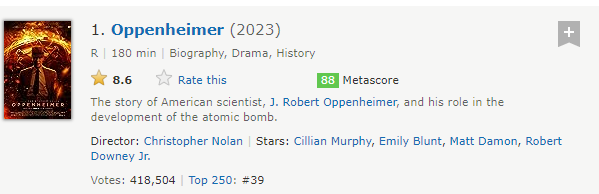

In [11]:
import requests # to make HTTP requests
from bs4 import BeautifulSoup # to pull data out of HTML file

In [12]:
base_url='https://www.imdb.com'
query='/search/title/?groups=top_250'

In [13]:
url=base_url+query

In [14]:
record=dict()
list_of_records=list()

while url is not None:
    
    # 1.Get the data from the website by making HTTP requests
    response=requests.get(url)
    
    # 2.Pull data out of HTML file
    imdb_html=BeautifulSoup(response.content,'html.parser')
    
    #3.Bigboxes
    for index,bigbox in enumerate(imdb_html.find_all('div',{'class':'lister-item mode-advanced'})):
        box=bigbox.find_all('div',{'class':'lister-item-content'})
        
        
        # section 1:
        
        try:
            sno=box[0].find_all('h3',{'class':'lister-item-header'})[0].find_all('span')[0].text.replace('.','')
        except:
            sno=''
            
        try:
            title=box[0].find_all('h3',{'class':'lister-item-header'})[0].find_all('a')[0].text
        except:
            title=''
            
        try:    
            year=box[0].find_all('h3',{'class':'lister-item-header'})[0].find_all('span')[1].text.replace('(','').replace(')','')
        except:
            year=''
    
        # section 2:
        
        try:
            certificate=box[0].find_all('p')[0].find_all('span',{'class':'certificate'})[0].text
        except:
            certificate=''
            
        try:
            total_mins=box[0].find_all('p')[0].find('span',{'class':'runtime'}).text.replace(' min','')
        except:
            total_mins=''
            
            
        try:
            genre=box[0].find_all('p')[0].find('span',{'class':'genre'}).text.replace('\n','').replace(' ','')
        except:
            genre=''
    
        # section 3:
        
        try:
            rating=box[0].find_all('div',{'class':'ratings-bar'})[0].div.strong.text
        except:
            rating=''
            
        try:
            metascore=box[0].find_all('div',{'class':'ratings-bar'})[0].find_all('div',{'class':'inline-block ratings-metascore'})[0].span.text.replace(' ','')
        except:
            metascore=''
    
        # section 4:
        try:
            movie_description=box[0].find_all('p')[1].text.replace('\n','')
        except:
            movie_description=''
        
        # section 5:
        
        try:
            director=box[0].find_all('p')[2].text.replace('\n','').replace(' ','').split(sep='|')[0].split(sep=':')[1] #director
        except:
            director=''
            
        try:
            star_cast=box[0].find_all('p')[2].text.replace('\n','').replace(' ','').split(sep='|')[1].split(sep=':')[1] #stars
        except:
            star_cast=''
    
        # section 6:
    
        try:
            votes=box[0].find_all('p')[3].find_all('span')[1].text
        except:
            votes=''
        
        record={'sno':sno,
                'title':title,
                'year':year,
                'certificate':certificate,
                'total_mins':total_mins,
                'genre':genre,
                'rating':rating,
                'metascore':metascore,
                'movie_description':movie_description,
                'director':director,
                'star_cast':star_cast,
                'votes':votes
               }
        
        
        list_of_records.append(record)
        
    # 4.Get the next page url
    try:
        next_url=imdb_html.find_all('div',{'class':'desc'})[0].find_all('a',{'class':'lister-page-next next-page'})[0].get('href')
    except:
        next_url=None
        
    if next_url:
        url=base_url+next_url
    else:
        url=None

In [15]:
import pandas as pd
pd.DataFrame(data=list_of_records)[['sno',
 'title',
 'year',
 'certificate',
 'total_mins',
 'genre',
 'rating',
 'director',
 'votes']]

,sno,title,year,certificate,total_mins,genre,rating,director,votes
0,1,Oppenheimer,2023,R,180,"Biography,Drama,History",8.6,ChristopherNolan,"418,584"
1,2,Spider-Man: Across the Spider-Verse,2023,U,140,"Animation,Action,Adventure",8.7,"JoaquimDosSantos,KempPowers,JustinK.Thompson","251,458"
2,3,Interstellar,2014,UA,169,"Adventure,Drama,Sci-Fi",8.7,ChristopherNolan,"1,982,918"
3,4,The Godfather,1972,A,175,"Crime,Drama",9.2,FrancisFordCoppola,"1,946,858"
4,5,The Shawshank Redemption,1994,A,142,Drama,9.3,FrankDarabont,"2,794,785"
...,...,...,...,...,...,...,...,...,...
245,246,Pather Panchali,1955,U,125,Drama,8.2,SatyajitRay,"36,131"
246,247,La passion de Jeanne d'Arc,1928,,110,"Biography,Drama,History",8.1,CarlTheodorDreyer,"58,400"
247,248,The Gold Rush,1925,,95,"Adventure,Comedy,Drama",8.1,CharlesChaplin,"115,530"
248,249,Babam ve Oglum,2005,,112,"Drama,Family",8.2,ÇaganIrmak,"89,499"
